### Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataset

In [24]:
import sqlite3
import pandas as pd

conn1 = sqlite3.connect('Data/cruise_pre.db')
df1 = pd.read_sql_query("SELECT * FROM cruise_pre", conn1)  
conn1.close()

conn2 = sqlite3.connect('Data/cruise_post.db')
df2 = pd.read_sql_query("SELECT * FROM cruise_post", conn2)  
conn2.close()


### Data Cleaning for EDA

In [25]:
# Combining Both Datasets Because Both have same rows
combined_df = pd.concat([df1, df2], axis = 1)
combined_df = combined_df.drop(['index', 'index'], axis = 1)

In [26]:
# Saving CSV for future Use
combined_df.to_csv('Data/ShipSail_Pandas.csv', index=False)

In [27]:
# Checking Null values
combined_df.isnull().sum()

Gender                                        13456
Date of Birth                                 14684
Source of Traffic                                 0
Onboard Wifi Service                          19492
Embarkation/Disembarkation time convenient    15643
Ease of Online booking                        18355
Gate location                                 17140
Logging                                           0
Onboard Dining Service                        16809
Online Check-in                               15687
Cabin Comfort                                 20252
Onboard Entertainment                         15913
Cabin service                                 13832
Baggage handling                              20293
Port Check-in Service                         14347
Onboard Service                               18327
Cleanliness                                   18402
Ext_Intcode                                       0
Cruise Name                                   15931
Ticket Type 

In [28]:
# Dropping Useless Columns
combined_df = combined_df.drop(['Ext_Intcode', 'Ext_Intcode', 'Ext_Intcode', 'Ext_Intcode'], axis = 1)

In [29]:
# Parsing Distance Column
import re
def clean_cruise_distance(distance):
    if isinstance(distance, str):
        numeric_value = re.search(r'\d+', distance)
        if numeric_value:
            return float(numeric_value.group())
    return None
combined_df['Cruise Distance'] = combined_df['Cruise Distance'].apply(clean_cruise_distance)
combined_df['Cruise Distance'] = combined_df['Cruise Distance'].abs()


In [30]:
# Separating Object and Int64/float64 Columns
Num_cols = list(combined_df.select_dtypes(['int64', 'float64']).columns)

In [31]:
# Null Values Imputation
def impute_null_with_mean(df, columns):
    for column in columns:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

def impute_null_with_mode(df):
    for column in df.select_dtypes(include=['object']):
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

impute_null_with_mode(combined_df)
impute_null_with_mean(combined_df, Num_cols)

combined_df.isnull().sum()


Gender                                        0
Date of Birth                                 0
Source of Traffic                             0
Onboard Wifi Service                          0
Embarkation/Disembarkation time convenient    0
Ease of Online booking                        0
Gate location                                 0
Logging                                       0
Onboard Dining Service                        0
Online Check-in                               0
Cabin Comfort                                 0
Onboard Entertainment                         0
Cabin service                                 0
Baggage handling                              0
Port Check-in Service                         0
Onboard Service                               0
Cleanliness                                   0
Cruise Name                                   0
Ticket Type                                   0
Cruise Distance                               0
WiFi                                    

### Exploratory Data Analysis

#### Analysis
From the Distribution of gender it is clear that large number of females had their reservations for the Ship Sail this portrays the past reputation of the company regarding safe and friendly environment for families. On contrary large number of males too reserved for the said purpose

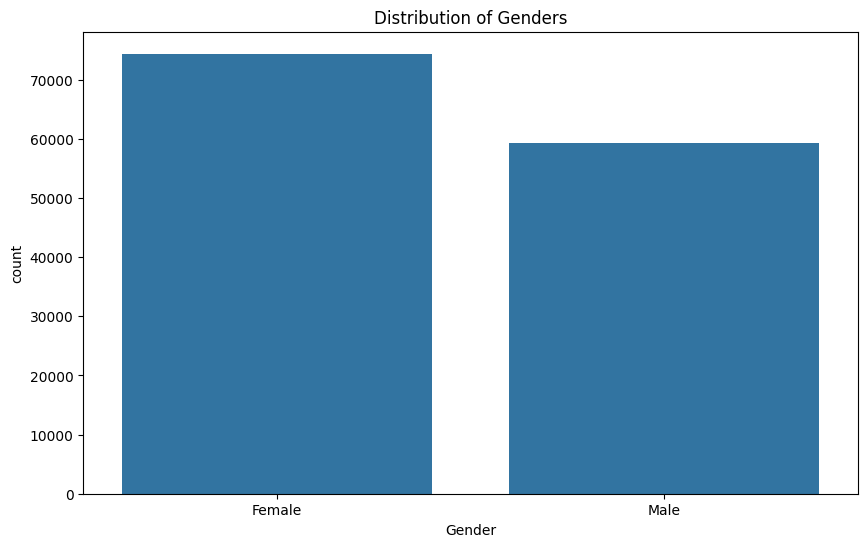

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='Gender')
plt.title('Distribution of Genders')
plt.show()

#### Analysis
This information might help the company to enhance their services for better customer aquisition. You can see more people opted for less use of internet on the journey which portrays that people were more into spending time with families and enjoy rather scrolling and using internet. This also tells that large number of families reserved their tickets rather than solo travellers

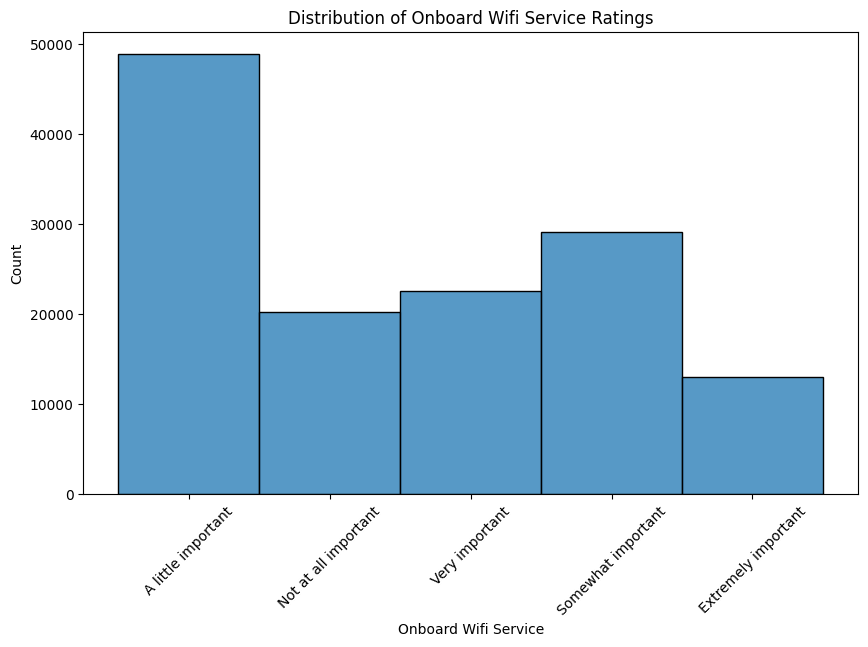

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='Onboard Wifi Service', bins=5)
plt.title('Distribution of Onboard Wifi Service Ratings')
plt.xticks(rotation = 45)
plt.show()

#### Analysis
Analysis of ratings reveal that company got their customers from almost all of their customer aquisition platforms. That means they should keep their pace and no need till now to enhance social media marketing or performance marketing.

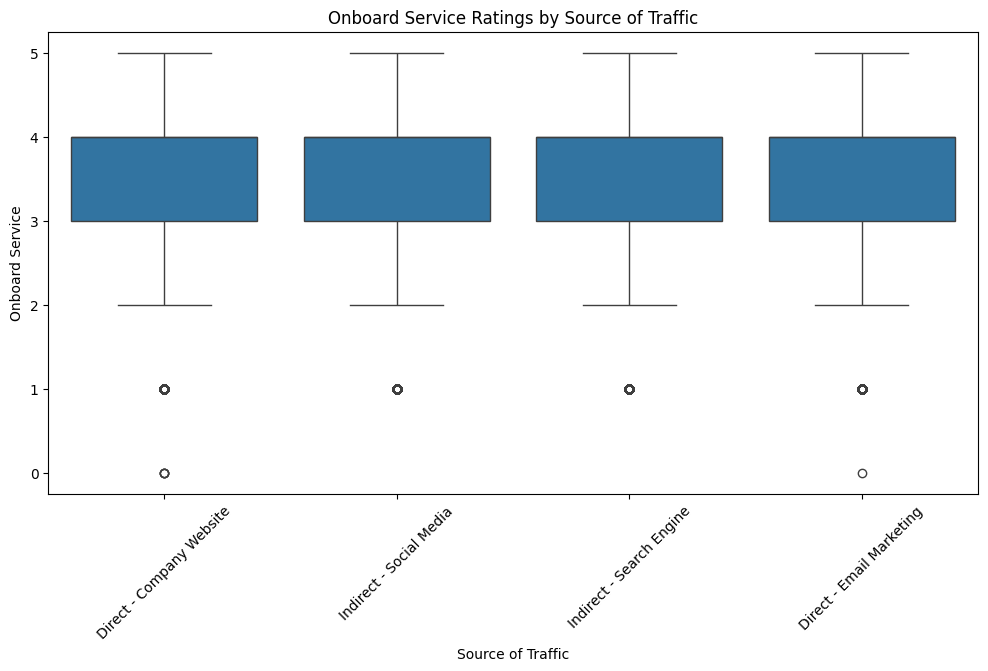

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x='Source of Traffic', y='Onboard Service')
plt.title('Onboard Service Ratings by Source of Traffic')
plt.xticks(rotation=45)
plt.show()

Descriptive Statistics for Cruise Distance:
 count    133746.000000
mean       1192.146939
std         942.577426
min          31.000000
25%         451.000000
50%         965.000000
75%        1597.000000
max        4983.000000
Name: Cruise Distance, dtype: float64


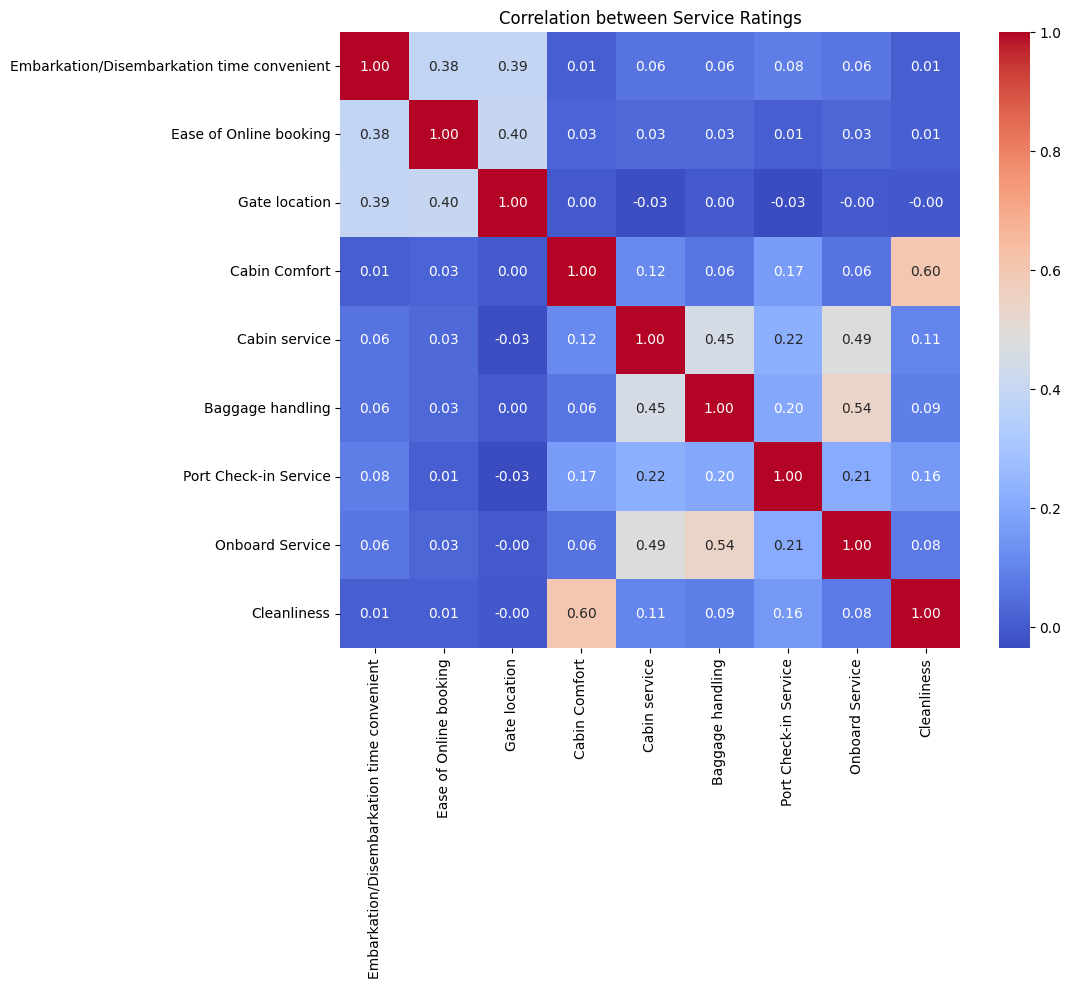

In [39]:
# Statistical Analysis
cruise_distance_stats = combined_df['Cruise Distance'].describe()
print("Descriptive Statistics for Cruise Distance:\n", cruise_distance_stats)

service_ratings = combined_df[['Embarkation/Disembarkation time convenient', 'Ease of Online booking',
                        'Gate location', 'Cabin Comfort', 'Cabin service', 'Baggage handling',
                        'Port Check-in Service', 'Onboard Service', 'Cleanliness']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(service_ratings, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Service Ratings')
plt.show()

#### Analysis

This analysis will help the company to better their UI experience for booking purposes on their booking platforms such as website/app. They got average rating between 2-3. That portrays poor and not user friendly experience for online reservations. It completely negates the purpose of having online reservations which are supposed to be user friendly. 

Company should pay attention to their online booking platforms to increase their customer traffic.

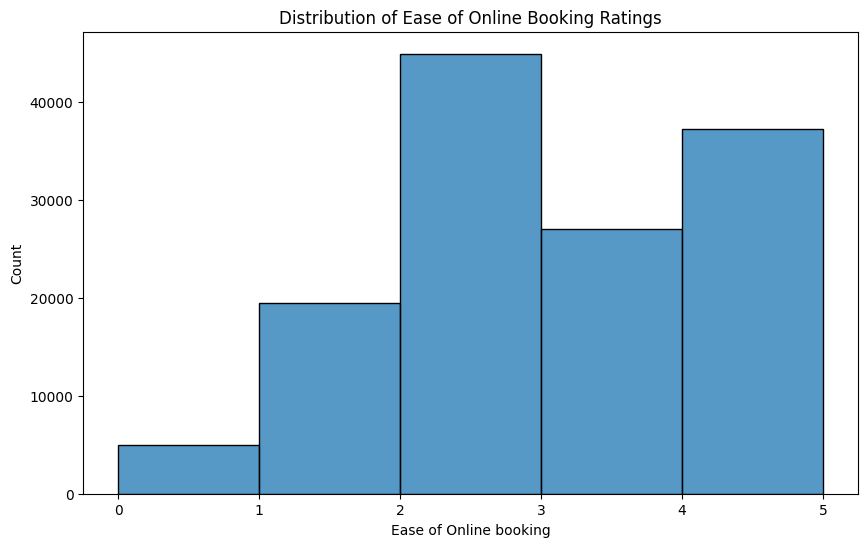

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='Ease of Online booking', bins=5)
plt.title('Distribution of Ease of Online Booking Ratings')
plt.show()

#### Analysis

This shows that each type of suites had same level of cleanliness ratings. Clealiness is a basic thing and having rating between 3-4 tells us that there were hygiene issues. Even customers who paid more and reserved delux tickets got same hygiene issues. This might effect their business. So they should start paying attention to their cleanliness procedures.

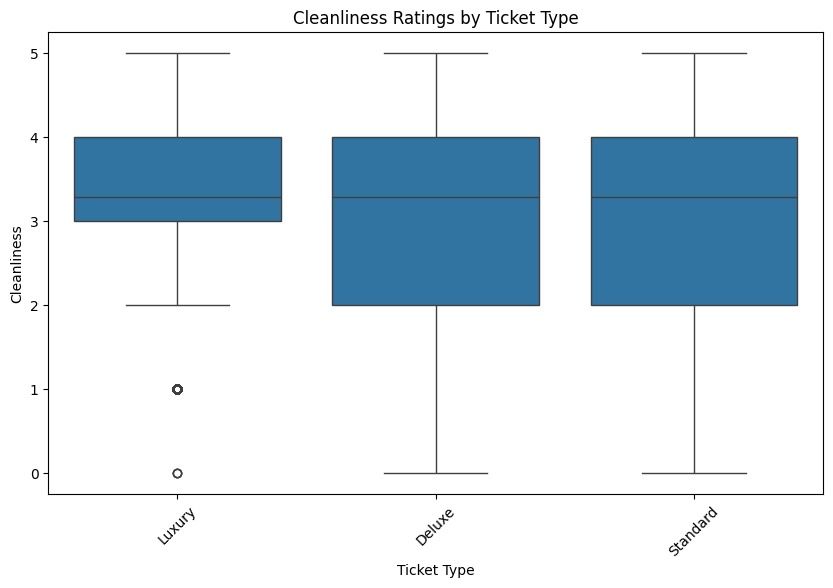

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Ticket Type', y='Cleanliness')
plt.title('Cleanliness Ratings by Ticket Type')
plt.xticks(rotation=45)
plt.show()

#### Analysis
This analysis will help the company to know the customer preference based on their gender. Both male and females opted for luxury reservations and after that standard. From the above analysis we observed the hygiene issues in delux despite having higher price than the standard one. Clearly this is affecting their business. Company should increase incentives in their delux ticket or reduce prices a bit.

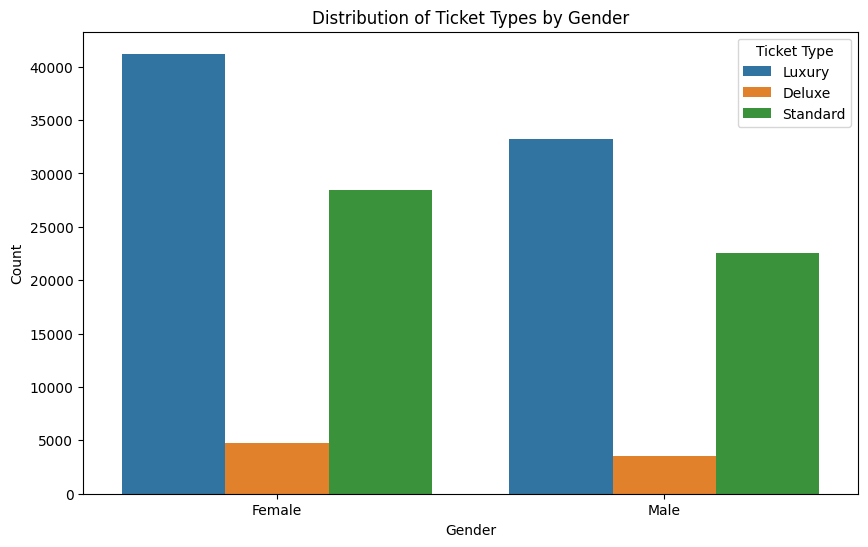

In [33]:
# Plotting the relationship between genders and ticket types
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='Gender', hue='Ticket Type')
plt.title('Distribution of Ticket Types by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


#### Analysis

Almost everyone regardless of what type of ticket they booked. Faced the same bad user experience of company's online booking platforms. This might affect their business very much. They should pay attention to this issue more seriously.

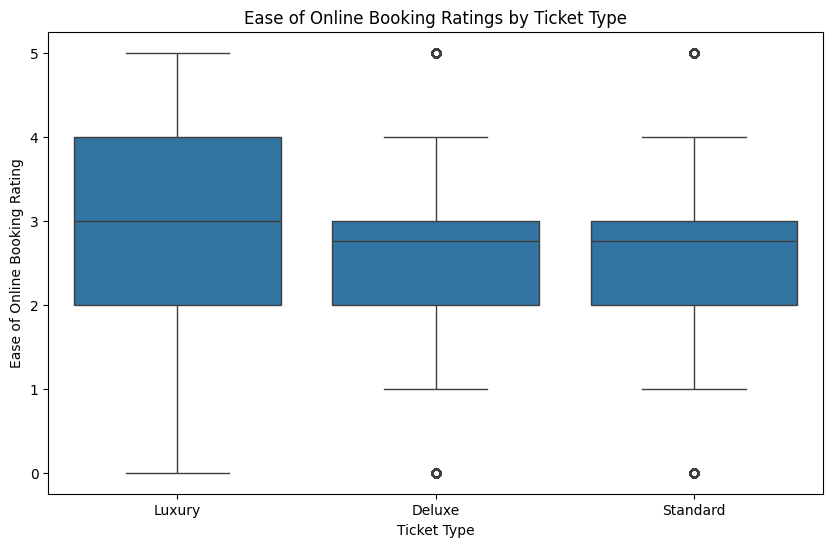

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Ticket Type', y='Ease of Online booking')
plt.title('Ease of Online Booking Ratings by Ticket Type')
plt.xlabel('Ticket Type')
plt.ylabel('Ease of Online Booking Rating')
plt.show()
